In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import *
import random, math
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

xtrain = pd.read_csv('../input/X_train.csv')
ytrain = pd.read_csv('../input/y_train.csv')
train = pd.merge(xtrain, ytrain, how='left', on='series_id')

xtest = pd.read_csv('../input/X_test.csv')
ytest = pd.read_csv('../input/sample_submission.csv')
test = pd.merge(xtest, ytest, how='left', on='series_id')
print(train.shape, test.shape)

# Any results you write to the current directory are saved as output.

['y_train.csv', 'sample_submission.csv', 'X_train.csv', 'X_test.csv']
(487680, 15) (488448, 14)


In [2]:
train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete


In [3]:
test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,surface
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439,concrete
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273,concrete
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990,concrete
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270,concrete
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100,concrete


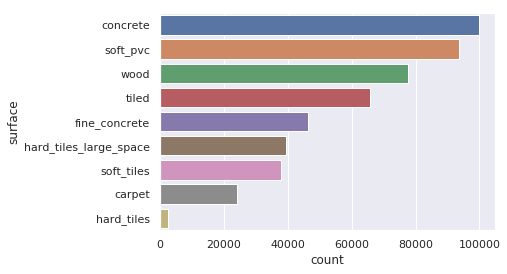

In [4]:
sns.set(style='darkgrid')
sns.countplot(y = 'surface',
              data = train,
              order = train['surface'].value_counts().index)
plt.show()

In [5]:
seriesFineConcrete = train[train["series_id"]==0]
seriesConcrete = train[train["series_id"]==1]
seriesSoftTiles = train[train["series_id"]==4]

In [ ]:
seriesFineConcrete.shape

In [ ]:
seriesFineConcrete.head()

In [ ]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(seriesFineConcrete.columns[3:-2]):
    plt.subplot(3, 4, i + 1)
    plt.plot(seriesFineConcrete[col], 'r')
    plt.plot(seriesConcrete[col], 'g')
    plt.plot(seriesSoftTiles[col], 'b')
    plt.title(col)